# FeatureSelector 包含一些最常用的特征选择方法：

1.    具有高缺失值百分比的特征

2.    共线性（高度相关的）特征

3.    在基于树的模型中重要度为零的特征

4.    重要度较低的特征

5.    具有单个唯一值（unique value）的特征

In [1]:
from feature_selector import FeatureSelector
import pandas as pd

In [2]:
data_train = pd.read_csv(r"E:/datasets/kaggle/home-credit-default-risk/application_train.csv")
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data_target = data_train['TARGET']
data_train = data_train.drop(columns=["TARGET"])

### 创建实例

In [4]:
fs = FeatureSelector(data = data_train, labels = data_target)

### 缺失值

查找缺失值比例超过特定阈值的特征。下面的调用能识别缺失值比例超过 60% 的特征（粗体是输出结果）。

In [5]:
fs.identify_missing(missing_threshold=0.6)

17 features with greater than 0.60 missing values.



In [6]:
fs.missing_stats.head(20)

,missing_fraction
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
COMMONAREA_MEDI,0.698723
NONLIVINGAPARTMENTS_AVG,0.694330
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_MEDI,0.694330
FONDKAPREMONT_MODE,0.683862
LIVINGAPARTMENTS_MEDI,0.683550
LIVINGAPARTMENTS_AVG,0.683550
LIVINGAPARTMENTS_MODE,0.683550


### 要查看待移除特征，我们可以读取 FeatureSelector 的 ops 属性，这是一个 Python 特征词典，特征会以列表的形式给出。

In [7]:
missing_features = fs.ops['missing'] # 一共17个确实超60%的字段

In [8]:
missing_features 

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

## 绘制缺失值

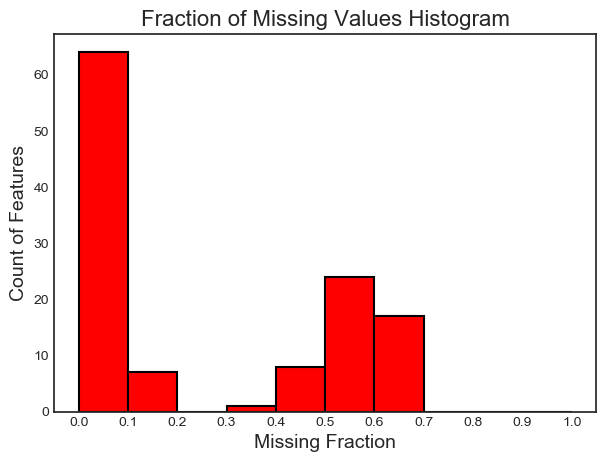

In [9]:
fs.plot_missing() # 各变量缺失值占比图

## 单值变量

将变量中中只有一个值的变量找出并删除

In [10]:
fs.identify_single_unique()

0 features with a single unique value.



In [11]:
single_unique = fs.ops['single_unique'] #列出单值列
single_unique

[]

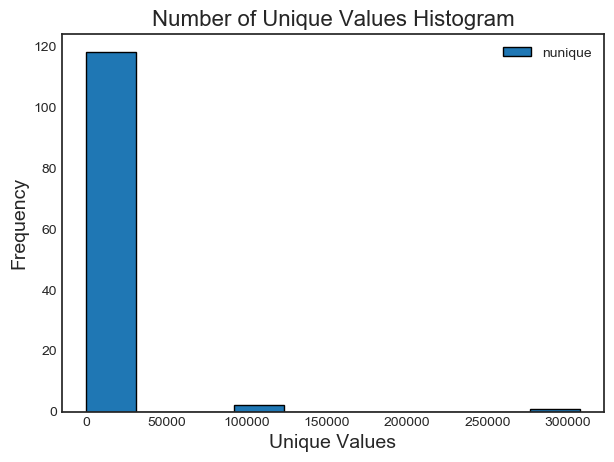

In [12]:
fs.plot_unique()

In [13]:
# 列出每个变量中所含元素个数
fs.unique_stats.sample(5)


,nunique
OBS_30_CNT_SOCIAL_CIRCLE,33
BASEMENTAREA_AVG,3780
FLAG_DOCUMENT_8,2
FLAG_DOCUMENT_6,2
FLOORSMIN_MEDI,47


## 共线性特征 

共线性特征是指彼此之间高度关联的特征

identify_collinear 方法能基于指定的相关系数值查找共线性特征。对于每一对相关的特征，它都会标识出其中要移除的一个（因为我们只需要移除其中一个）

In [14]:
fs.identify_collinear(correlation_threshold = 0.98)

20 features with a correlation magnitude greater than 0.98.



使用热图可以很好地可视化共线性。下图展示了所有至少有一个相关关系（correlation）超过阈值的特征：

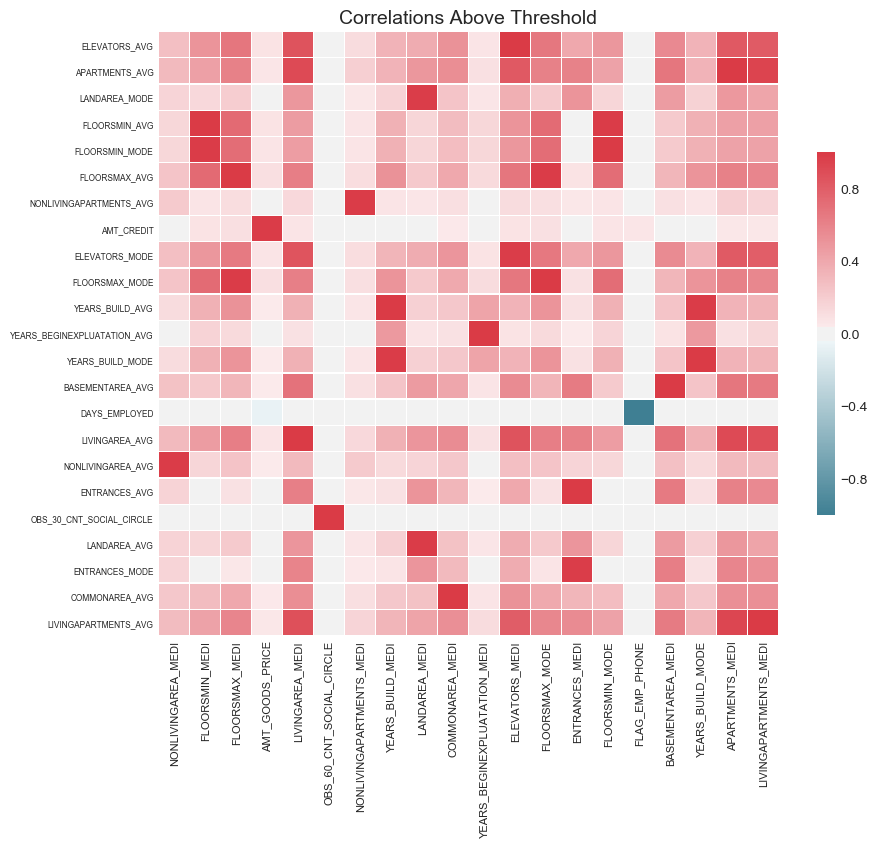

In [15]:
fs.plot_collinear()
# fs.plot_collinear(plot_all=True)


## 和之前一样，我们可以访问将会被移除的整个相关特征列表，或者在一个 dataframe 中查看高度相关的特征对

In [16]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']

In [17]:
# dataframe of collinear features
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,AMT_GOODS_PRICE,AMT_CREDIT,0.986968
1,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999755
2,YEARS_BUILD_MODE,YEARS_BUILD_AVG,0.989444
3,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985689
4,FLOORSMIN_MODE,FLOORSMIN_AVG,0.985875


## 0重要特征 （监督学习专用）

#### 参数：

task:“classification“ or “regression“

eval_metric: the metric used for **early stopping** (for example auc for classification or l2 for regression). To see a list of available metrics, refer to the LightGBM docs

n_iterations:迭代次数，默认10次

early_stopping:训练模型时是否使用早停？ (default = True)

In [18]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)


Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[362]	valid_0's auc: 0.76334
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[377]	valid_0's auc: 0.758105
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[340]	valid_0's auc: 0.756522
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[370]	valid_0's auc: 0.764106
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[366]	valid_0's auc: 0.762686
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[236]	valid_0's auc: 0.753934
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[282]	valid_0's auc: 0.760896
Training until validation scores don't improve for 100 rounds.
Early st

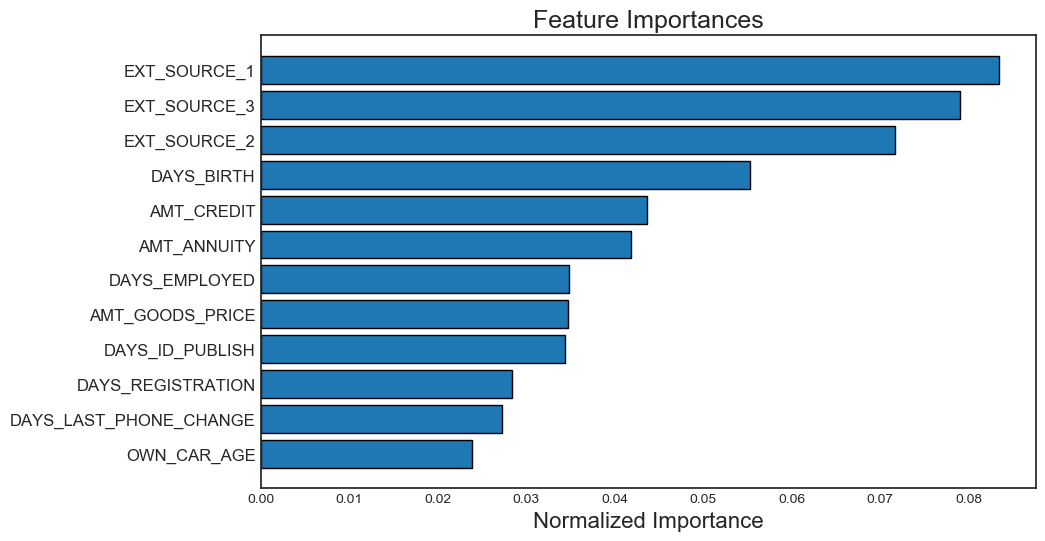

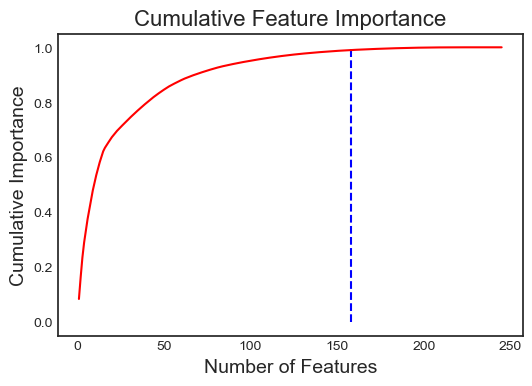

158 features required for 0.99 of cumulative importance


In [19]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

### 左图给出了 plot_n 最重要的特征（重要度进行了归一化，总和为 1）。右图是对应特征数量的累积重要度。蓝色竖线标出了累积重要度为 99% 的阈值。

#### 训练梯度提升机是随机的，这意味着模型每次运行后，特征重要度都会改变。

这应该不会有太大的影响（最重要的特征不会突然就变成最不重要的），但这会改变某些特征的排序，也会影响识别出的零重要度特征的数量。如果特征重要度每次都改变，请不要感到惊讶！

要训练机器学习模型，特征首先要经过 one-hot 编码。这意味着某些被识别为零重要度的特征可能是在建模过程中加入的 one-hot 编码特征。

### 当我们到达特征移除阶段时，还有一个选项可移除任何被添加进来的 one-hot 编码的特征。但是，如果我们要在特征选择之后做机器学习，我们还是必须要 one-hot 编码这些特征。

## 低重要度特征

identify_low_importance 函数能找到重要度最低的特征，这些特征无助于指定的总重要性。

In [24]:
# 即使没有这些特征也能达到 99% 的重要度。

fs.identify_low_importance(cumulative_importance = 0.99)

157 features required for cumulative importance of 0.99 after one hot encoding.
88 features do not contribute to cumulative importance of 0.99.



### low_importance 方法借鉴了主成分分析（PCA）中的一种方法，其中仅保留维持一定方差比例（比如 95%）所需的主成分是很常见的做法。要纳入考虑的总重要度百分比基于同一思想。

# 只有当我们要用基于树的模型来做预测时，基于特征重要度的方法才真正有用。除了结果随机之外，基于重要度的方法还是一种黑箱方法，也就是说我们并不真正清楚模型认为某些特征无关的原因。如果使用这些方法，多次运行它们看到结果的改变情况，也许可以创建具有不同参数的多个数据集来进行测试！

# 移除特征